# Descriptive statistics of data

Marcos Duarte

Here is a function for the calculation of descriptive statistics which might be useful for the initial characterization and visualization of numerical data.  
The function signature is:
```python
stats = statdesc(data, missing='NaN', labels=[], alpha=.05, show=2)
```
And the function help:

In [1]:
import sys
sys.path.insert(1, r'./functions')  # add to pythonpath
from statdesc import statdesc

help(statdesc)

Help on function statdesc in module statdesc:

statdesc(data, missing='NaN', labels=[], alpha=0.05, show=2)
    Descriptive statistics of data.
    
    This function calculates the following statistics for each column
    (variable) of the input: mean and unbiased standard deviation [1]_, 95%
    confidence interval (confidence limits for the mean) with unknown
    population STD [2]_, minimum and maximum, median, 25th and 75th percentiles
    [3]_, test for normality (Shapiro-Wilk's test) [4]_, and a test for
    equality of variances for all columns (Levene's or Bartlett's test) [5]_.
    
    This function also generates plots (if matplotlib is available) to
    visualize the data and shows the calculated statistics on screen.
    
    Parameters
    ----------
    data : array_like
        1D or 2D (column oriented) numerical data with possible missing values
    
    missing : string ('nan') or number (int or float), optional
        option to enter a number representing missing 

Let's test `statdesc.py`:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

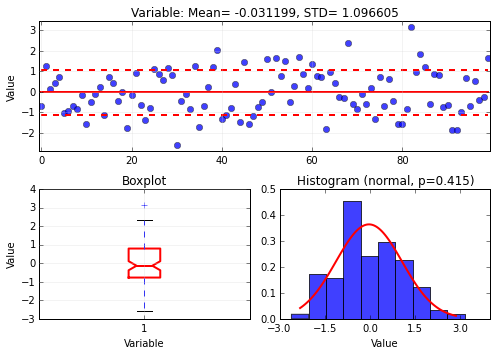

-----------------------------------------------------------
Descriptive statistics for data (100 rows, 1 column)
0 missing values
-----------------------------------------------------------
Variable              Mean             STD
-----------------------------------------------------------
1                -0.031199        1.096605
-----------------------------------------------------------
95% confidence interval with unknown population STD
Variable             Lower           Upper
-----------------------------------------------------------
1                -0.058260       -0.004138
-----------------------------------------------------------
Variable           Minimum         Maximum
-----------------------------------------------------------
1                -2.604322        3.143039
-----------------------------------------------------------
Variable            Median   25th percent.   75th percent.
-----------------------------------------------------------
1                -0.1

In [3]:
stats = statdesc(np.random.randn(100, 1))

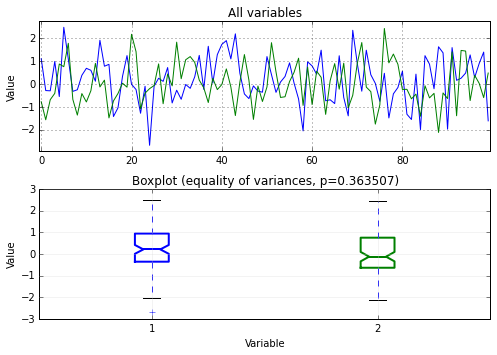

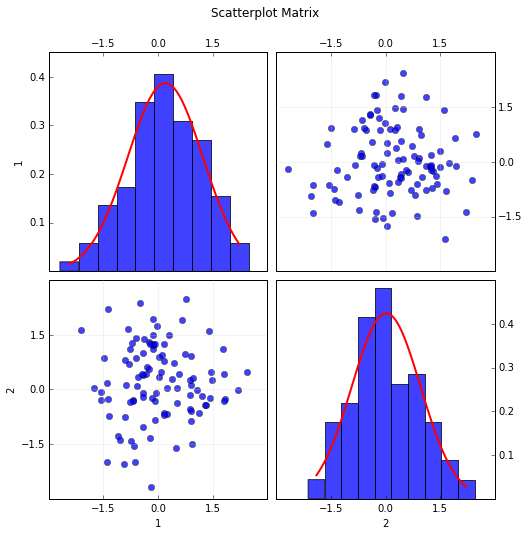

-----------------------------------------------------------
Descriptive statistics for data (100 rows, 2 columns)
0 missing values
-----------------------------------------------------------
Variable              Mean             STD
-----------------------------------------------------------
1                 0.200145        1.036444
2                 0.015605        0.945703
-----------------------------------------------------------
95% confidence interval with unknown population STD
Variable             Lower           Upper
-----------------------------------------------------------
1                 0.174568        0.225721
2                -0.007732        0.038943
-----------------------------------------------------------
Variable           Minimum         Maximum
-----------------------------------------------------------
1                -2.688702        2.489992
2                -2.123743        2.438873
-----------------------------------------------------------
Variable  

In [4]:
stats = statdesc(np.random.randn(100, 2), show=1)

## Function cogve.py

In [ ]:
# %load statdesc.py
#!/usr/bin/env python
"""Descriptive statistics of data."""

from __future__ import division, print_function

__author__ = 'Marcos Duarte, https://github.com/demotu/BMC'
__version__ = "1.0.2"
__license__ = "MIT"

import numpy as np
import scipy.stats as stats
try:
    import matplotlib.pyplot as plt
    import matplotlib.ticker as ticker
except ImportError:
    plt = None


def statdesc(data, missing='NaN', labels=[], alpha=.05, show=2):
    """
    Descriptive statistics of data.

    This function calculates the following statistics for each column
    (variable) of the input: mean and unbiased standard deviation [1]_, 95%
    confidence interval (confidence limits for the mean) with unknown
    population STD [2]_, minimum and maximum, median, 25th and 75th percentiles
    [3]_, test for normality (Shapiro-Wilk's test) [4]_, and a test for
    equality of variances for all columns (Levene's or Bartlett's test) [5]_.

    This function also generates plots (if matplotlib is available) to
    visualize the data and shows the calculated statistics on screen.

    Parameters
    ----------
    data : array_like
        1D or 2D (column oriented) numerical data with possible missing values

    missing : string ('nan') or number (int or float), optional
        option to enter a number representing missing values (default = 'nan')

    labels : list of strings, optional
        labels for each column (variable) in data

    alpha : float, optional
        statistical significance level (to decide which test for equality of
        variances to use)

    show : integer (0 or 1 or 2), optional
        option to show plots with some descritive statistics (0: don't show
        any plot; 1: show plots only for the grouped data; 2: show plots for
        individual data as well as for the grouped data (default))

    Returns
    -------
    m_sd : array
        mean and unbiased standard deviation of each column (variable) in data

    ci : array
        95% confidence interval (confidence limits for the mean) with unknown
        population STD for each column (variable) in data

    min_max : array
        minimum and maximum of each column (variable) in data

    quartiles : array
        median, 25th and 75th percentiles of each column (variable) in data

    normality : array
        test for normality of each column (variable) in data (Shapiro-Wilk's
        test)

    eq_var : array
        test for equality of variances for all columns (variables) in data
        (Levene's or Bartlett's test)

    References
    ----------
    .. [1] http://www.itl.nist.gov/div898/handbook/eda/section3/eda356.htm
    .. [2] http://www.itl.nist.gov/div898/handbook/prc/section1/prc14.htm.
    .. [3] http://www.itl.nist.gov/div898/handbook/prc/section2/prc252.htm.
    .. [4] http://www.itl.nist.gov/div898/handbook/prc/section2/prc213.htm.
    .. [5] http://www.itl.nist.gov/div898/handbook/eda/section3/eda35a.htm.

    Examples
    --------
    >>> import numpy as np
    >>> from statdesc import statdesc
    >>> y = np.random.randn(20,3)
    >>> statdesc(y)                # use the default options
    >>> y[8:12,1] = np.NaN         # add a missing value
    >>> y[12,1] = 2                # add another missing value
    >>> statdesc(y, False, 2, ['A','B'], .01) # set arguments
    >>> m_sd,ci,minmax,quartiles,normality,eq_var = statdesc(y)

    See Also
    --------
    scipy.stats.describe : Computes several descriptive statistics using Scipy
    pandas.DataFrame.describe : Computes several descriptive statistics using Pandas

    """

    data = np.asarray(data)  # convert the input to array
    if len(data.shape) == 1:
        data = data.reshape(data.shape[0], 1)
    # missing data: don't use masked arrray, some functions don't handle that
    if isinstance(missing, (int, float)) and ~np.isnan(missing):
        # if missing option is string, must be 'NaN', then data has already NaN
        data[data == missing] = np.NaN

    m_sd = np.zeros((data.shape[1], 2)) * np.NaN
    ci = np.zeros((data.shape[1], 2)) * np.NaN
    min_max = np.zeros((data.shape[1], 2)) * np.NaN
    quartiles = np.zeros((data.shape[1], 3)) * np.NaN
    normality = np.zeros((data.shape[1], 2)) * np.NaN
    eq_var = np.zeros((1, 2)) * np.NaN
    x = []
    nmiss = 0
    min_len = 0

    for i in range(data.shape[1]):
        # due to missing data, each column can have different length;
        # use list of arrays
        x.append(data[~np.isnan(data[:, i]), i])
        nmiss += data.shape[0] - x[i].shape[0]  # total number of missing value
        # skip empty array (data column with missing data only)
        if x[i].shape[0] == 0:
            print('Skipping column %d, only missing data' % (i + 1))
            continue
        # at least 2 sets with 3 points to test for equality of variances
        if x[i].shape[0] > 2:
            min_len += 1
        # handle labels
        if len(labels) > i and labels[i]:
            pass
        else:
            if len(labels) > i:
                labels[i] = str(i+1)
            else:
                labels.append(str(i+1))
        # summary statistics
        m_sd[i], ci[i], min_max[i], quartiles[i], normality[i] = summary(x[i])
        if show > 1 and plt:  # PLOT
            #plot for each variable
            plot1var(data[:, i], x[i], m_sd[i], min_max[i], normality[i],
                     labels[i], alpha, data.shape[1])

    # remove empty arrays (data columns with missing data only)
    i = 0
    while i < len(x):
        if x[i].size == 0:
            x.pop(i)
        else:
            i += 1

    # test for equality of variances
    if len(x) > 1 and min_len > 1:
        # at least 2 sets with 3 points to run this function
        # Levene's test is an alternative to the Bartlett test. The Levene test
        # is less sensitive than the Bartlett test to departures from normality
        # For data with nornal distribution, Bartlett's test has better
        # performance.
        if np.all(normality[:, 1] > .05):
            eq_var[0] = stats.bartlett(*x)
        else:
            eq_var[0] = stats.levene(*x, center='median')

    if show and plt:  # PLOT
        if data.shape[1] > 1:
            #summary plot
            plotallvar(data, x, min_max, eq_var, min_len, alpha, labels)
            #scatterplot matrix
            scatterplot(data, x, label=labels)

    #print results on screen
    statprint(m_sd, ci, min_max, quartiles, normality, eq_var,
              labels, alpha, data.shape[0], data.shape[1], nmiss, len(x))

    return m_sd, ci, min_max, quartiles, normality, eq_var


def summary(x):
    """summary statistics"""

    # mean and standard deviation (unbiased)
    m_sd = np.mean(x), np.std(x, ddof=1)
    # 95% confidence interval (confidence limits for the mean)
    ci = np.zeros((1, 2)) * np.NaN
    if x.shape[0] > 1:  # at least 2 points to run this function
        ci = stats.t._pdf(.975, x.size - 1) * m_sd[1] / np.sqrt(x.size) * \
            np.array([-1, 1]) + m_sd[0]
    # minimum and maximum
    min_max = x.min(), x.max()
    # median, and 25th and 75th percentiles
    quartiles = np.median(x), np.percentile(x, 25), np.percentile(x, 75)
    # test for normality
    # Shapiro-Wilk function is nicer (returns an exact p value) and simpler
    normality = np.zeros((1, 2)) * np.NaN
    if x.shape[0] > 2:  # at least 3 points to run this function
        normality = stats.shapiro(x)  # Shapiro-Wilk's test
        #A2,critical,sig = stats.anderson(x,dist='norm') #Anderson-Darling test
        #sig2 = sig[A2>critical]
        #normality =  A2, ( sig2[-1] if sig2.size else sig[0] )/100

    return m_sd, ci, min_max, quartiles, normality


def plot1var(data, x, m_sd, min_max, normality, labels, alpha, ncol):
    """Summary plot for each variable"""

    plt.figure(figsize=(7, 5))
    ax1 = plt.subplot(211)
    ax1.plot(data, 'bo', alpha=0.75)
    ax1.plot([0, data.shape[0] - 1], [m_sd[0], m_sd[0]], 'r', linewidth=2)
    ax1.plot([0, data.shape[0] - 1], [m_sd[0] + m_sd[1], m_sd[0] + m_sd[1]],
             'r--', linewidth=2)
    ax1.plot([0, data.shape[0] - 1], [m_sd[0] - m_sd[1], m_sd[0] - m_sd[1]],
             'r--', linewidth=2)
    ax1.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
    title = 'Variable: Mean= %f, STD= %f' % (m_sd[0], m_sd[1]) if ncol == 1 \
            else 'Variable %s: Mean= %f, STD= %f' % (labels, m_sd[0], m_sd[1])
    ax1.set_title(title)
    #ax1.set_xlabel('Index')
    ax1.set_ylabel('Value')
    if x.shape[0] > 1:
        plt.xlim(xmin=-.5, xmax=data.shape[0] - .5)
        plt.ylim(ymin=min_max[0] - .05*(min_max[1] - min_max[0]),
                 ymax=min_max[1] + .05 * (min_max[1] - min_max[0]))
    ax2 = plt.subplot(223)
    h2 = ax2.boxplot(x, notch=1)
    plt.setp(h2['boxes'], color='r', linewidth=2)
    plt.setp(h2['medians'], color='r', linewidth=2)
    plt.xticks([1], [labels])
    ax2.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
    ax2.set_title('Boxplot')
    ax2.set_xlabel('Variable')
    ax2.set_ylabel('Value')
    ax3 = plt.subplot(224)
    nbins = 2 * np.sqrt(x.size) if x.size < 100 else np.sqrt(x.size)
    n, bins, patches = ax3.hist(x, nbins, normed=1, fc='blue', alpha=0.75)
    bincenters = np.linspace((bins[0] + bins[1]) / 2,
                             (bins[-2] + bins[-1]) / 2, 100)
    # curve for the normal PDF
    y = stats.norm.pdf(bincenters, loc=m_sd[0], scale=m_sd[1])
    ax3.plot(bincenters, y, 'r-', linewidth=2)
    ax3.set_xlabel('Value')
    #ax3.set_ylabel('Probability')
    distribution = 'normal' if normality[1] > alpha else 'not normal'
    ax3.set_title('Histogram (%s, p=%1.3f)' % (distribution, normality[1]))
    ax3.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5, prune=None))
    ax3.yaxis.set_major_locator(ticker.MaxNLocator(nbins=5, prune=None))
    plt.tight_layout()
    plt.show()


def plotallvar(data, x, min_max, eq_var, min_len, alpha, labels):
    """Summary plot for all variables"""

    plt.figure(figsize=(7, 5))
    ax1 = plt.subplot(211)
    h1 = ax1.plot(data)
    ax1.grid(True)
    ax1.set_title('All variables')
    #ax1.set_xlabel('Index')
    ax1.set_ylabel('Value')
    #ax1.legend(labels[0:data.shape[1]])
    plt.xlim(xmin=-.5, xmax=data.shape[0] - .5)
    if min_max.max()-min_max.min() > 0:
        plt.ylim(ymin=min_max.min() - .05 * (min_max.max() - min_max.min()),
                 ymax=min_max.max() + .05 * (min_max.max() - min_max.min()))
    ax2 = plt.subplot(212)
    h2 = ax2.boxplot(x, notch=1)
    ax2.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
    ax2.set_title('Boxplot')
    if min_len > 1:
        if eq_var[0, 1] > alpha:
            tit = 'Boxplot (equality of variances, p=%f)' % eq_var[0, 1]
        else:
            tit = 'Boxplot (no equality of variances, p=%f)' % eq_var[0, 1]
        ax2.set_title(tit)
    ax2.set_xlabel('Variable')
    ax2.set_ylabel('Value')
    rot = 0 if len(''.join(labels)) < 50 else 45
    plt.xticks(range(1, data.shape[1] + 1), labels[0: data.shape[1]],
               rotation=rot)
    #Set boxplot color based on color of line plot
    for i in range(len(h1)):
        plt.setp(h2['boxes'][i], color=h1[i].get_c(), linewidth=2)
        plt.setp(h2['medians'][i], color=h1[i].get_c(), linewidth=2)
    plt.tight_layout()
    plt.show()


def scatterplot(data, x, label=None):
    """Scatterplot matrix for array data
    data have all the data (inlcuding missing data)
    x is a list of arrays without the missing data (for histogram and fitting)
    """

    fig, ax = plt.subplots(data.shape[1], data.shape[1], figsize=(8, 8))
    fig.suptitle('Scatterplot Matrix', fontsize=12)
    fig.subplots_adjust(hspace=0.04, wspace=0.04)
    nbins2 = 4 if data.shape[1] > 3 else 5
    for i in range(data.shape[1]):
        for j in range(data.shape[1]):
            #ax1 = plt.subplot(data.shape[1],data.shape[1],data.shape[1]*i+j+1)
            if i == j:
                nbins = 2 * np.sqrt(x[i].size) \
                    if x[i].size < 100 else np.sqrt(x[i].size)
                n, bins, patches = ax[i, j].hist(x[i], nbins, normed=1,
                                                 facecolor='blue', alpha=0.75)
                bincenters = np.linspace((bins[0] + bins[1]) / 2,
                                         (bins[-2] + bins[-1]) / 2, 100)
                y = stats.norm.pdf(bincenters, x[i].mean(), scale=x[i].std())
                ax[i, j].plot(bincenters, y, 'r-', linewidth=2)
                #ax[i, j].annotate(label[j], (0.05, 0.85),
                #    xycoords='axes fraction',fontweight='bold')
            else:
                ax[i, j].plot(data[:, i], data[:, j], 'bo', alpha=0.75)
                ax[i, j].grid(True, linestyle='-', which='major',
                              color='lightgrey', alpha=0.5)
            ax[i, j].xaxis.set_visible(False)
            ax[i, j].yaxis.set_visible(False)
            ax[i, j].xaxis.set_major_locator(ticker.MaxNLocator(nbins=nbins2,
                                             prune='both'))
            ax[i, j].yaxis.set_major_locator(ticker.MaxNLocator(nbins=nbins2,
                                             prune='both'))
            if ax[i, j].is_first_col():
                ax[i, j].yaxis.set_ticks_position('left')
                ax[i, j].yaxis.set_visible(True)
                ax[i, j].set_ylabel(label[i])
            if ax[i, j].is_last_col():
                ax[i, j].yaxis.set_ticks_position('right')
                ax[i, j].yaxis.set_visible(True)
            if ax[i, j].is_first_row():
                ax[i, j].xaxis.set_ticks_position('top')
                ax[i, j].xaxis.set_visible(True)
            if ax[i, j].is_last_row():
                ax[i, j].xaxis.set_ticks_position('bottom')
                ax[i, j].xaxis.set_visible(True)
                ax[i, j].set_xlabel(label[j])
    plt.show()


def statprint(m_sd, ci, min_max, quartiles, normality, eq_var, labels, alpha,
              nrow, ncol, nmiss, nx):
    """print results on screen"""

    print('-----------------------------------------------------------')
    str_row = 'rows' if nrow > 1 else 'row'
    str_col = 'columns' if ncol > 1 else 'column'
    print('Descriptive statistics for data (%d %s, %d %s)' \
          % (nrow, str_row, ncol, str_col))
    print('%d missing values' % nmiss)
    print('-----------------------------------------------------------')
    print('%-10s %15s %15s' % ('Variable', 'Mean', 'STD'))
    print('-----------------------------------------------------------')
    for i in range(ncol):
        print('%-10s %15f %15f' % (labels[i], m_sd[i, 0], m_sd[i, 1]))
    print('-----------------------------------------------------------')
    print('%s' % ('95% confidence interval with unknown population STD'))
    print('%-10s %15s %15s' % ('Variable', 'Lower', 'Upper'))
    print('-----------------------------------------------------------')
    for i in range(ncol):
        print('%-10s %15f %15f' % (labels[i], ci[i, 0], ci[i, 1]))
    print('-----------------------------------------------------------')
    print('%-10s %15s %15s' % ('Variable', 'Minimum', 'Maximum'))
    print('-----------------------------------------------------------')
    for i in range(ncol):
        print('%-10s %15f %15f' % (labels[i], min_max[i, 0], min_max[i, 1]))
    print('-----------------------------------------------------------')
    print('%-10s %15s %15s %15s' % ('Variable', 'Median', '25th percent.',
                                    '75th percent.'))
    print('-----------------------------------------------------------')
    for i in range(ncol):
        print('%-10s %15f %15f %15f' % (labels[i], quartiles[i, 0],
                                        quartiles[i, 1], quartiles[i, 2]))
    print('-----------------------------------------------------------')
    print('%s' % ("Shapiro-Wilk's test for normality"))
    print('%-10s %15s %15s' % ('Variable', 'W statistic', 'p value'))
    print('-----------------------------------------------------------')
    for i in range(ncol):
        print('%-10s %15f %15f' % (labels[i], normality[i, 0], normality[i, 1]))
    print('-----------------------------------------------------------')
    if nx > 1:
        if np.all(normality[:, 1] > alpha):
            print("Barlett's test for equality of variances")
        else:
            print("Levene's test for equality of variances")
        print('%26s %15s' % ('t statistic', 'p value'))
        print('-----------------------------------------------------------')
        print('%26f %15f' % (eq_var[0, 0], eq_var[0, 1]))
        print('-----------------------------------------------------------')


if __name__ == '__main__':
    #import sys
    #statdesc(sys.argv[1:])
    y = np.random.randn(100, 3)  # ; y[5:10,1] = np.nan
    statdesc(y, 1, [], ['A', 'B', 'C', 'D'], .05)
